# Lesson1

In [1]:
import math
import numpy
from matplotlib import pyplot

In [19]:
N=50
x_start, x_end= -2.0, 2.0
y_start, y_end= -1.0, 1.0
x=numpy.linspace(x_start, x_end, N)
y=numpy.linspace(y_start, y_end, N)
print('x=', x)
print('y=', y)
X, Y = numpy.meshgrid(x,y)

x= [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y= [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.2653

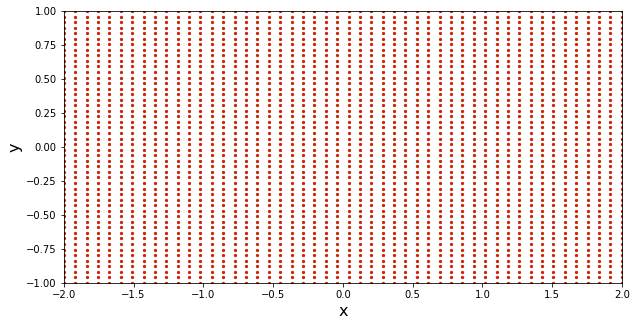

In [18]:
%matplotlib inline
width=10.0
height=(y_end-y_start)/(x_end-x_start)*width
pyplot.figure(figsize=(width,height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X,Y,s=5,color='#CD2305',marker='o')

In [4]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [5]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * numpy.pi) * numpy.arctan2((Y - ys), (X - xs))
    
    return psi

In [6]:
strength_source = 5.0           
x_source, y_source = -1.0, 0.0  
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

In [7]:
u_inf = 1.0
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

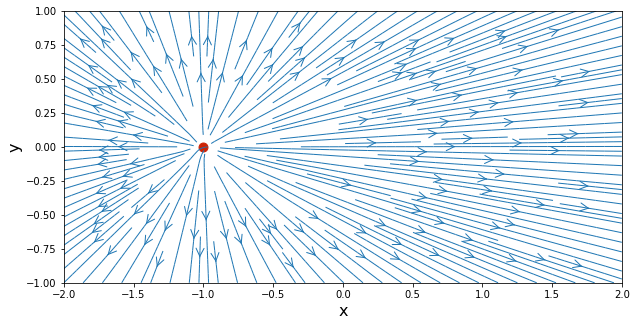

In [8]:
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_source, v_source,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_source, y_source,
               color='#CD2305', s=80, marker='o');

In [9]:
strength_sink = -5.0                    
x_sink, y_sink = 1.0, 0.0                

u_sink = (strength_sink / (2 * math.pi) *
          (X - x_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))
v_sink = (strength_sink / (2 * math.pi) *
          (Y - y_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))

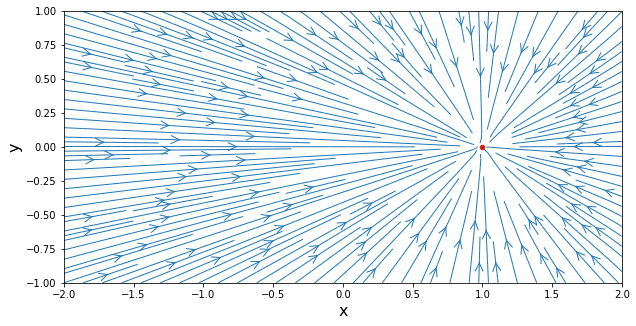

In [10]:
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_sink, v_sink,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_sink, y_sink,
               color='#CD2305', s=80, marker='.');

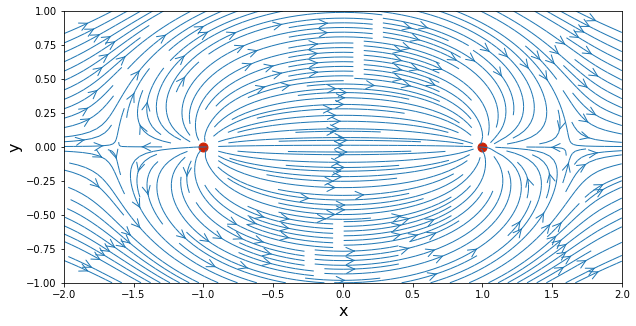

In [11]:
u_pair = u_source + u_sink+u_freestream
v_pair = v_source + v_sink+v_freestream

width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_pair, v_pair,
                  density=2.0, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], 
               color='#CD2305', s=80, marker='o');


In [12]:
strength_sink = -5.0        
x_sink, y_sink = 1.0, 0.0   
u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

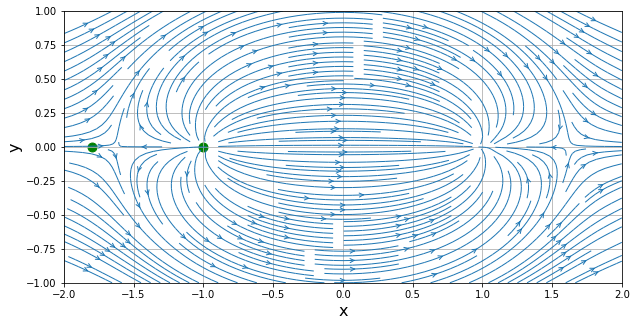

In [13]:
u = u_freestream + u_source+u_sink
v = v_freestream + v_source+v_sink
psi = psi_freestream + psi_source+psi_sink
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#008000', s=80, marker='o')
x_stagnation = x_source - strength_source / (2 * numpy.pi * u_inf)
y_stagnation = y_source
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')
pyplot.contour(X, Y, psi, 
               levels=[-strength_source / 2, strength_source / 2], 
               colors='#008000', linewidths=2, linestyles='solid');

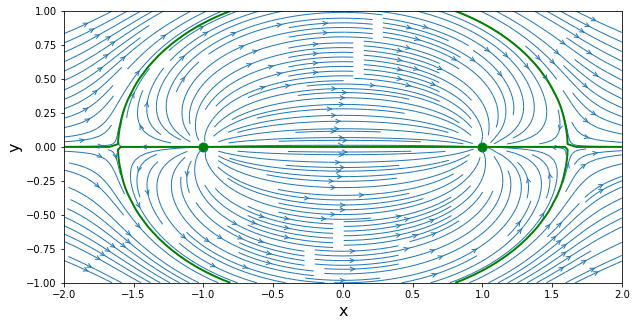

In [14]:
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
               color='#008000', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#008000', linewidths=2, linestyles='solid');

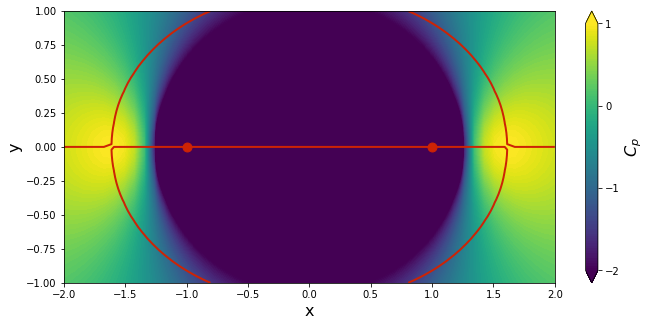

In [15]:
cp = 1.0 - (u**2 + v**2) / u_inf**2
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');